До лекції з ЗХТ-1 #13

https://youtu.be/hFztJSo1Fgw Методика рішення СДР у Python


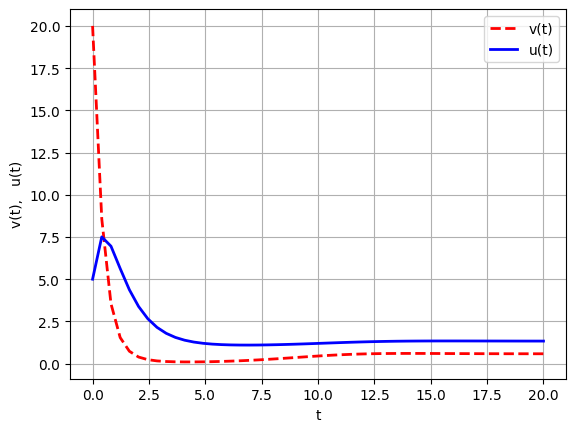

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def F(s,t):
   a = 4; b = 7
   dvdt = a * s[0] - (s[1]/(s[1]+1)) * b * s[0]
   dudt = (s[1]/(s[1]+1)) * s[0] -s[1] + 1
   return [dvdt, dudt]
t = np.linspace(0,20)
s0=[20,5]
s = odeint(F,s0,t)
plt.plot(t,s[:,0],'r--', linewidth=2.0,label="v(t)")
plt.plot(t,s[:,1],'b-', linewidth=2.0,label="u(t)")
plt.xlabel("t")
plt.ylabel("v(t),   u(t)")
plt.legend()
plt.grid()
plt.show()

Перевірка констант швидкостей:

In [ ]:
import math
tem=303
k1=1.84E9*math.exp(-60910/(8.31*tem))
k2= 1.93E8*math.exp(-58100/(8.31*tem))
print (k1, k2)

0.05741358767455297 0.018383369213833593


Кібер завдання https://drive.google.com/open?id=1_rF2JoO132yZSeMJIqiThpcuvsJ_xmEW ЛР №2

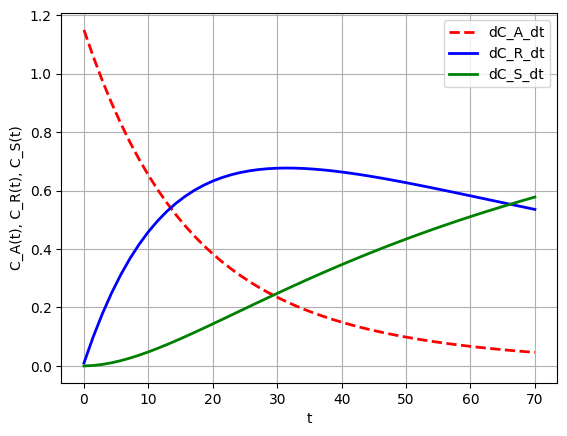

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
def Ftem(s,t):
   # tem=303

   Qp=131.0E5
   ro=810 # кг/м3, а повинно бути кмоль/м3
   # нехай молярна маса суміші 100 г/моль, кг/кмоль, тоді:
   # ro = 810/100
   Cp=1600 # Дж/(кг*К)
   # Cp=1600/100 # Дж/(кмоль*K)
   # V=0.8 # м3

   dC_A_dt = -1.84E9*math.exp(-60910/(8.31*s[3]))*s[0]
   dC_R_dt = 1.84E9*math.exp(-60910/(8.31*s[3]))*s[0] - 1.93E8*math.exp(-58100/(8.31*s[3]))*s[1]
   dC_S_dt = 1.93E8*math.exp(-58100/(8.31*s[3]))*s[1]
   # за МВ:
   dT_dt = -Qp/(ro*Cp)*1.93E8*math.exp(-58100/(8.31*s[3]))*s[1]
   # версія1 СА
   # dT_dt = -Qp/Cp*1.93E8*math.exp(-58100/(8.31*s[3]))*s[1]

   return [dC_A_dt, dC_R_dt, dC_S_dt, dT_dt]

t = np.linspace(0,70)
s0=[1.15, 0.01, 0, 303]
s = odeint(Ftem,s0,t)
plt.plot(t,s[:,0],'r--', linewidth=2.0,label="dC_A_dt")
plt.plot(t,s[:,1],'b-', linewidth=2.0,label="dC_R_dt")
plt.plot(t,s[:,2],'g-', linewidth=2.0,label="dC_S_dt")
plt.xlabel("t")
plt.ylabel("C_A(t), C_R(t), C_S(t)")
plt.legend()
plt.grid()
plt.show()

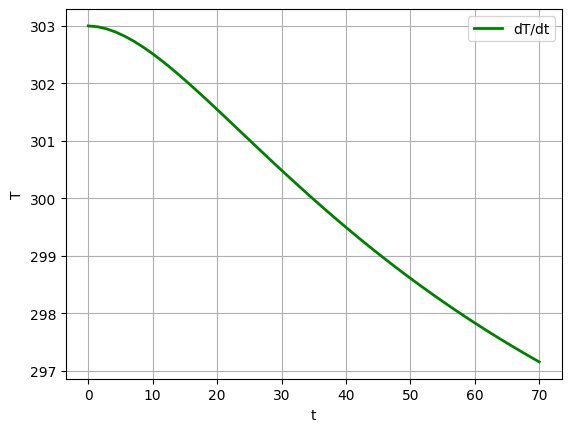

In [ ]:
plt.plot(t,s[:,3],'g-', linewidth=2.0, label="dT/dt")
plt.xlabel("t")
plt.ylabel("T")
plt.legend()
plt.grid()
plt.show()

Каскад реакторів (умовний)
Результат роботи 1-ї стадії:

In [ ]:
s1_0=s[49][0]
s1_1=s[49][1]
s1_2=s[49][2]
s1_3=s[49][3]
s1_0 = [s1_0, s1_1, s1_2, s1_3]
s1_0

[0.046331198464788864,
 0.5356642828773831,
 0.5780045186578279,
 297.15751605369036]

Ступень перетворення:

In [ ]:
X1=(s[0][0]-s[49][0])/s[0][0]*100
X1

95.97120013349661

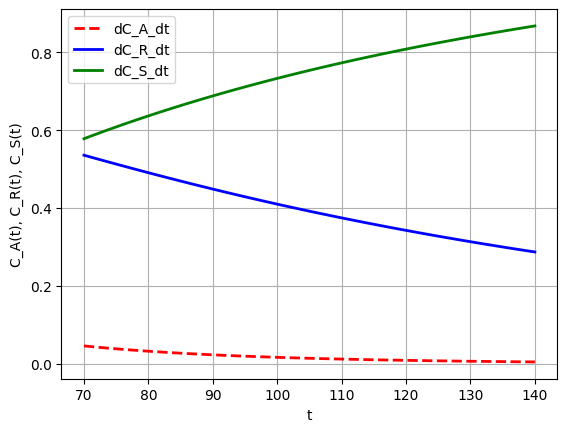

In [ ]:
t = np.linspace(70,140)
s1 = odeint(Ftem,s1_0,t)
plt.plot(t,s1[:,0],'r--', linewidth=2.0,label="dC_A_dt")
plt.plot(t,s1[:,1],'b-', linewidth=2.0,label="dC_R_dt")
plt.plot(t,s1[:,2],'g-', linewidth=2.0,label="dC_S_dt")
plt.xlabel("t")
plt.ylabel("C_A(t), C_R(t), C_S(t)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
X2=(s1[0][0]-s1[49][0])/s1[0][0]*100
# Загальна Х:
X12=(s[0][0]-s1[49][0])/s[0][0]*100
print (X1, X2, X12)

95.97120013349661 88.66963181629 99.54352214174035


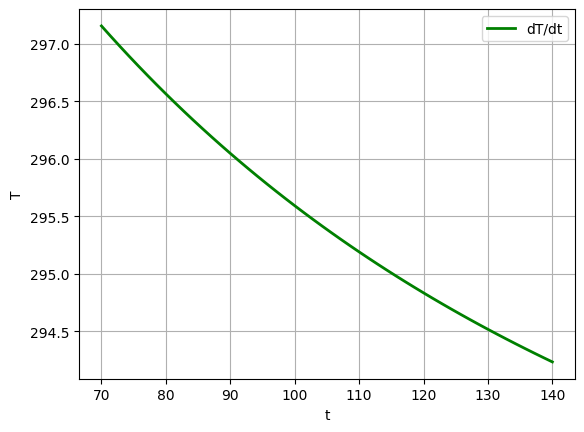

In [ ]:
plt.plot(t,s1[:,3],'g-', linewidth=2.0, label="dT/dt")
plt.xlabel("t")
plt.ylabel("T")
plt.legend()
plt.grid()
plt.show()

Тут буде ізотермічний режим. Треба спростити адіабатичний режим.

In [ ]:
# тут код

Тут буде політермічний режим. Треба додати до прикладу (адіабатичного режиму) підведення теплоти.

In [ ]:
# тут код

РІВ розгляд

In [ ]:
L=2 # м - довжина реактору, але можемо почати з Q
t=70 # с - результат аналізу кінетики (наприклад) - див. графік
# t=L/w
w=L/t
w # м/с

0.02857142857142857

In [ ]:
Q=100 # м3/год Результат аналізу продуктивності даного виробництва
# w = Q/F [м/год]
# F=Q/w розмірність? треба м2
w1=w*3600 # м/год
F=Q/w1
# F=pi*D**2/4
D=math.sqrt(4*F/math.pi)
D # м

1.1125968630207577

І це все. Оскільки математична модель реактору РІВ та ж сама, що і РІЗ-п.
РІЗ проточний дивимось тут: https://colab.research.google.com/drive/1Kfz4q6iib_IcC-cOTJcNagN53pXJBBNQ?usp=sharing